In [142]:
import numpy as np
import matplotlib.pyplot as plt
f = open('/Users/vladimirberman/Downloads/Telegram Desktop/data_group6.txt', 'r')

In [148]:
def filt(mass):
    dub = mass
    for i in range(6, len(dub) - 6):
        k = i
        dub[i] = 1 / 24 * dub[i-6] + 1 / 12 * (dub[i-5] + dub[i-4] + dub[i-3] + dub[i-2] + dub[i-1] + dub[i] + dub[i+1] + dub[i+2] + dub[i+3] + dub[i+4] + dub[i+5]) + 1 / 24 * dub[i+6]
    return dub

In [87]:
lines = f.readlines()
result = []
data = np.zeros([len(lines), 4])

In [88]:
for i in range(len(lines)):
    lines[i] = lines[i].replace('\n', '')
    result.append(lines[i].split())
for i in range(len(result)):
    for j in range(4):
        data[i][j] = float(result[i][j])
    

Text(0.5, 1.0, 'Monthly mean sunspot number and solar radio flux F10.7 cm')

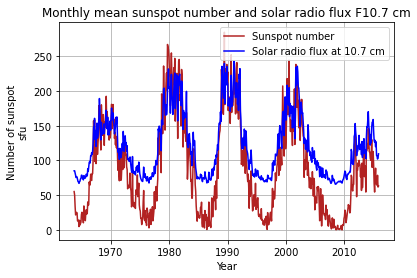

In [128]:
plt.plot(data[:,0] + (data[:,1] - 1) / 12, data[:,3], color = 'firebrick')
plt.plot( data[:,0] + (data[:,1] - 1) / 12, data[:,2], color = 'b')
plt.grid()
plt.ylabel('Number of sunspot\nsfu')
plt.xlabel('Year')
# plt.twinx().plot( data[:,0] + (data[:,1] - 1) / 12, data[:,2], color = 'b')
plt.legend(['Sunspot number', 'Solar radio flux at 10.7 cm'])
plt.title('Monthly mean sunspot number and solar radio flux F10.7 cm')

Text(0.5, 1.0, 'Scatter plot')

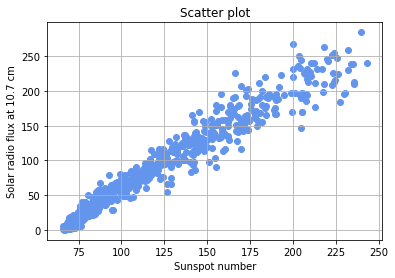

In [141]:
plt.scatter(data[:,2], data[:, 3], color = 'cornflowerblue')
plt.grid()
plt.ylabel('Solar radio flux at 10.7 cm')
plt.xlabel('Sunspot number')
# plt.legend('Sunspot number to sfu')
plt.title('Scatter plot')

Text(0.5, 1.0, 'Smoothing monthly mean sunspot number and solar radio flux F10.7 cm')

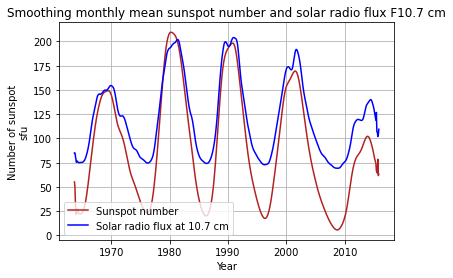

In [152]:
plt.plot(data[:,0] + (data[:,1] - 1) / 12, filt(data[:,3]), color = 'firebrick')
plt.plot(data[:,0] + (data[:,1] - 1) / 12, filt(data[:,2]), color = 'b')
plt.grid()
plt.ylabel('Number of sunspot\nsfu')
plt.xlabel('Year')
# plt.twinx().plot( data[:,0] + (data[:,1] - 1) / 12, data[:,2], color = 'b')
plt.legend(['Sunspot number', 'Solar radio flux at 10.7 cm'])
plt.title('Smoothing monthly mean sunspot number and solar radio flux F10.7 cm')

In [161]:
mu, sigma = 0, 0.1 # mean and standard deviation
e = np.random.normal(mu, sigma, len(data))
F = data[:, 2]
R = np.zeros([len(data), 4])
for i in range(len(data)):
    for j in range(4):
        R[i][j] = data[:,3][i] ** j


In [165]:
Rt = np.transpose(R)
b = np.dot(np.dot(np.linalg.inv(np.dot(Rt, R)), Rt), F)

In [168]:
F_itog = np.zeros(len(data))
for i in range(len(data)):
    F_itog[i] = b[0] + b[1] * data[:, 3][i] + b[2] * (data[:, 3][i] ** 2) + b[3] * (data[:, 3][i] ** 3)

Text(0.5, 1.0, 'Linear regression')

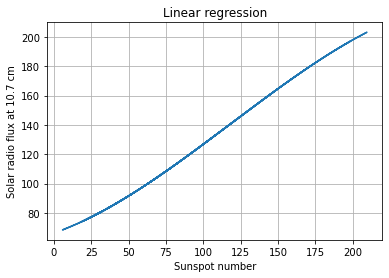

In [174]:
plt.plot(data[:, 3], F_itog)
plt.grid()
plt.ylabel('Solar radio flux at 10.7 cm')
plt.xlabel('Sunspot number')
plt.title('Linear regression')

In [176]:
sigma_2 = 1 / (len(data) - 1) * sum((F_itog - F) ** 2)

In [178]:
sigma_2 ** 0.5

5.637438270860692

In [179]:
np.std((F_itog - F))

5.632940912130593